# Test Notebook

In [2]:
from SimulationRL import *

populationMap   = 'Population Map/gpw_v4_population_count_rev11_2020_15_min.tif'
inputPath       = './'
outputPathTest  = './test_output/'
env             = simpy.Environment()
inputParams     = pd.read_csv(inputPath + "inputRL.csv")
locations       = inputParams['Locations'].copy()
inputParams['Locations'] = locations[:3]

No GPU available


In [3]:
earth1, graph1, bottleneck1, bottleneck2 = initialize(env, populationMap, inputPath + 'Gateways.csv', rKM, inputParams, movementTime, locations, './')

Using Kepler constellation design
total divisions in x = 1440
 total divisions in y = 720
 total cells = 1036800
 window of operation (longitudes) = (0, 1440)
 window of operation (latitudes) = (0, 720)

Finding cells within coverage area of GT 3 of 3
Time taken to find cells that are within range of all GTs: 1.4005959033966064 seconds
Time taken to add cell information to all GTs: 0.07695674896240234 seconds

Traffic generated per GT (totalAvgFlow per Milliard):
----------------------------------
Malaga, Spain: 2.0
Los Angeles, California, US: 2.0
Inuvik, Northwest Territories, Canada: 2.0
----------------------------------
State Space:
 ('UpLinked Up', 'UpLinked Down', 'UpLinked Right', 'UpLinked Left', 'Up Latitude', 'Up Longitude', 'DownLinked Up', 'DownLinked Down', 'DownLinked Right', 'DownLinked Left', 'Down Latitude', 'Down Longitude', 'RightLinked Up', 'RightLinked Down', 'RightLinked Right', 'RightLinked Left', 'Right Latitude', 'Right Longitude', 'LeftLinked Up', 'LeftLinked

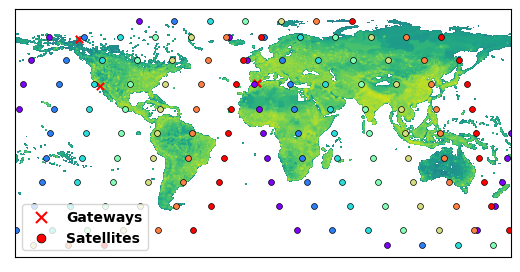

In [4]:
# plotShortestPath(earth1, pathBlocks[1][-1].path, outputPath)
earth1.plotMap(save=True)

In [ ]:
g = earth1.gateways[0].graph
shortestPath = nx.shortest_path(g, 'Malaga, Spain', 'Los Angeles, California, US', weight = 'slant_range')    # computes the shortest path [dataRate, slant_range, hops]

plotShortestPath(earth1, shortestPath, outputPathTest)

In [ ]:
print(dir(earth1))
g = earth1.gateways[0].graph
# Get a list of nodes
print("Nodes:", g.nodes())

# Get a list of edges
print("Edges:", g.edges())

print(type(g))


# for node, data in g.nodes(data=True):
#     for key, value in data.items():
#         # Convert non-serializable attributes to strings (or any other supported type)
#         if not isinstance(value, (str, int, float, bool)):
#             data[key] = str(value)  # or any other method of serialization

# for u, v, data in g.edges(data=True):
#     for key, value in data.items():
#         # Convert non-serializable attributes to strings
#         if not isinstance(value, (str, int, float, bool)):
#             data[key] = str(value)  # or any other method of serialization

# # Now write the graph

# nx.write_graphml(g, outputPathTest + "g.graphml")

In [ ]:
# Drawing the graph
plt.figure(figsize=(12, 8))
# nx.draw(g, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
# plt.title('Graph Representation')
# plt.show()
# for edge in g.edges(data=True):
#     print(edge)

# Drawing the graph using the slant range as the link distance
plt.figure(figsize=(14, 10))

# Positions for all nodes
pos = nx.spring_layout(g)  # This may not represent physical positions, as those are not known

# Edges are drawn with width proportional to the weight of the edge
edges, weights = zip(*nx.get_edge_attributes(g, 'slant_range').items())

# Normalize the weights to use for edge width (for better visualization)
max_weight = max(weights)
min_weight = min(weights)
weights = [((w - min_weight) / (max_weight - min_weight) * 5) + 0.1 for w in weights]  # +0.1 to avoid line width 0

nx.draw(g, pos, node_color='lightblue', edgelist=edges, edge_color=weights, width=weights, with_labels=True, node_size=700)

plt.title('Graph with Slant Range as Link Distance')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import networkx as nx

# Load your graph g
# g = nx.read_graphml('your_graph.graphml')  # You would uncomment this line and replace with your file path

# Extract node positions with checks for missing data
pos = {}
for node, data in g.nodes(data=True):
    lon = data.get('longitude', None)
    lat = data.get('latitude', None)
    if lon is not None and lat is not None:
        pos[node] = (float(lon), float(lat))

# Initialize figure and 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw nodes
for node, (lon, lat) in pos.items():
    ax.scatter(lon, lat, 0, color='red' if 'satellite' in node else 'blue', marker='o' if 'satellite' in node else 'x', s=50)

# Draw edges with checks for missing node positions
for edge in g.edges():
    if edge[0] in pos and edge[1] in pos:
        lon_start, lat_start = pos[edge[0]]
        lon_end, lat_end = pos[edge[1]]
        ax.plot([lon_start, lon_end], [lat_start, lat_end], [0, 0], color='gray')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
ax.set_title('Animated 3D Graph')

# Animation update function
def update(num, ax, fig):
    ax.view_init(elev=10, azim=num)

# Create animation
ani = FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50, fargs=(ax, fig))

# Display the plot
plt.show()

# To save the animation, use the following line:
# ani.save('animation.mp4', writer='ffmpeg', fps=30)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import networkx as nx

# Load your graph g
# g = nx.read_graphml('your_graph.graphml')  # You would uncomment this line and replace with your file path

# Diagnostic print to check if nodes have 'latitude' and 'longitude' attributes
print("Checking for 'latitude' and 'longitude' in nodes...")
for node, data in g.nodes(data=True):
    if 'latitude' not in data or 'longitude' not in data:
        print(f"Node {node} is missing 'latitude' or 'longitude' attributes")

# Extract node positions with checks for missing data
pos = {}
for node, data in g.nodes(data=True):
    lon = data.get('longitude', None)
    lat = data.get('latitude', None)
    if lon is not None and lat is not None:
        pos[node] = (float(lon), float(lat))

# Initialize figure and 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw nodes
for node, (lon, lat) in pos.items():
    ax.scatter(lon, lat, 0, color='red', zorder=5)

# Draw edges with checks for missing node positions
for edge in g.edges():
    if edge[0] in pos and edge[1] in pos:
        lon_start, lat_start = pos[edge[0]]
        lon_end, lat_end = pos[edge[1]]
        ax.plot([lon_start, lon_end], [lat_start, lat_end], 0, color='gray', zorder=4)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
ax.set_title('Animated 3D Graph')

# Animation update function
def update(num, ax, fig):
    ax.view_init(elev=10, azim=num)

# Create animation
ani = FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50, fargs=(ax, fig))

# Display the plot
plt.show()

# To save the animation, use the following line:
# ani.save('animation.mp4', writer='ffmpeg', fps=30)


In [ ]:
for node, data in g.nodes(data=True):
    if 'latitude' not in data or 'longitude' not in data:
        # print(dir(node))
        try:
            print((data['sat']))
        except KeyError:
            print((data['GT']))

In [ ]:
nx.__version__

In [ ]:
dir(earth1.LEO[0].sats[0])